# Apply a workflow to all images in a folder

In [1]:
from skimage.io import imread, imsave
import pyclesperanto_prototype as cle  # version 0.19.3
import napari_simpleitk_image_processing as nsitk  # version 0.4.4
from pathlib import Path

Loading ../../../data/BBBC007_batch/20P1_POS0005_D_1UL.tif
Saving ../../../data/BBBC007_batch/results/20P1_POS0005_D_1UL_neighbor_count_map.tif


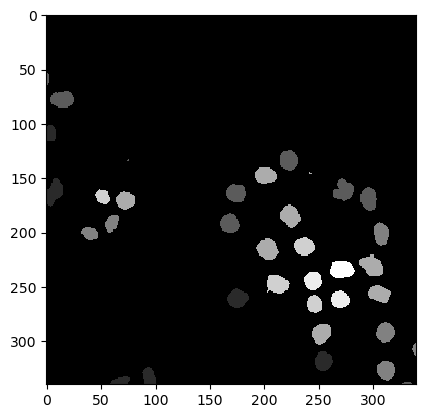

Loading ../../../data/BBBC007_batch/A9 p7d.tif
Saving ../../../data/BBBC007_batch/results/A9 p7d_neighbor_count_map.tif


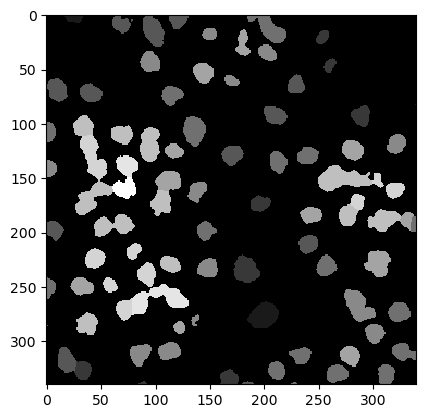

Loading ../../../data/BBBC007_batch/20P1_POS0010_D_1UL.tif
Saving ../../../data/BBBC007_batch/results/20P1_POS0010_D_1UL_neighbor_count_map.tif


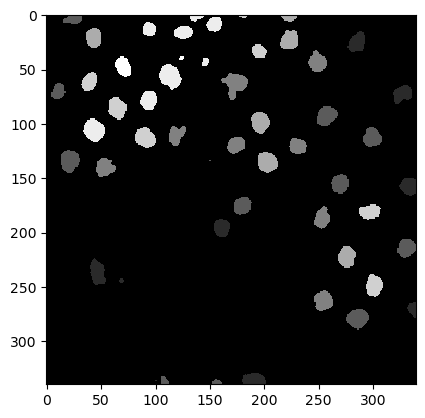

Loading ../../../data/BBBC007_batch/17P1_POS0013_D_1UL.tif
Saving ../../../data/BBBC007_batch/results/17P1_POS0013_D_1UL_neighbor_count_map.tif


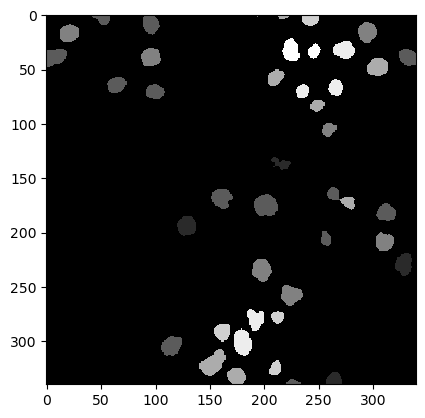

Loading ../../../data/BBBC007_batch/AS_09125_040701150004_A02f00d0.tif
Saving ../../../data/BBBC007_batch/results/AS_09125_040701150004_A02f00d0_neighbor_count_map.tif


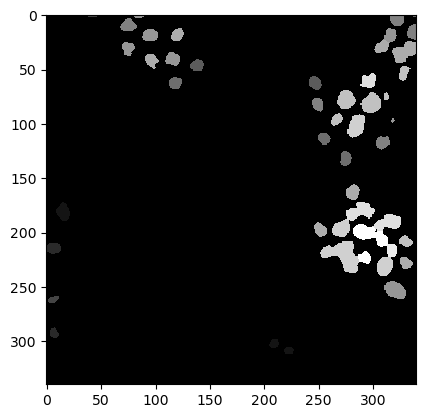

Loading ../../../data/BBBC007_batch/20P1_POS0007_D_1UL.tif
Saving ../../../data/BBBC007_batch/results/20P1_POS0007_D_1UL_neighbor_count_map.tif


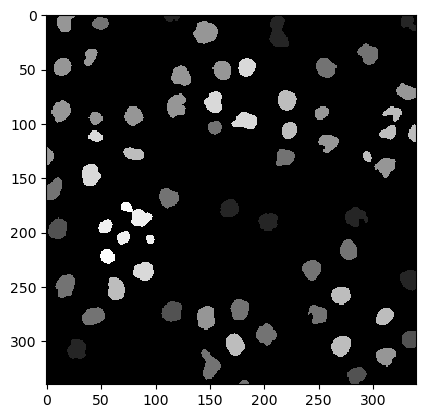

In [2]:
data_path = Path("../../../data/BBBC007_batch")
# define a folder to save the results
result_folder = data_path / "results"

# make sure the result folder exists
result_folder.mkdir(exist_ok=True)

for image_path in data_path.glob("*.tif"):
    # load image
    print("Loading " + str(image_path))
    image = imread(image_path)

    # reduce noise
    image1_gb = cle.gaussian_blur(image, None, 1.0, 1.0, 0.0)

    # subtract background
    image2_thb = cle.top_hat_box(image1_gb, None, 10.0, 10.0, 0.0)

    # binarize
    image3_to = cle.threshold_otsu(image2_thb)

    # label touching objects
    image4_T = nsitk.touching_objects_labeling(image3_to)

    # count neighbors
    image5_pncm = cle.proximal_neighbor_count_map(image4_T, None, 0.0, 50.0)

    # save the resulting label image in the result folder
    image_name_no_extension = image_path.stem
    output_path = result_folder / (image_name_no_extension + "_neighbor_count_map.tif")
    print("Saving " + str(output_path))
    imsave(output_path, image5_pncm)

    # show the result
    cle.imshow(image5_pncm)

    